In [1]:
import flask
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

## Load data 

In [2]:
df_pricing = pd.read_csv("C:/Users/Monaim/projet_bloc_5/data/get_around_pricing_project.csv", index_col=False)

In [3]:
df_analysis = pd.read_excel("C:/Users/Monaim/projet_bloc_5/data/get_around_delay_analysis.xlsx")

In [4]:
df_pricing.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
df_analysis.dropna(subset=["delay_at_checkout_in_minutes"],inplace=True)

In [6]:
select_id_card = list(set(df_analysis["car_id"]))[0:4843]

In [7]:
df_pricing.insert(0, "car_id", select_id_card)

In [8]:
df_pricing

,car_id,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,262144,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,360459,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,360460,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,393227,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,393239,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,414990,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,414991,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,349458,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,415000,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151


In [9]:
df_analysis

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
...,...,...,...,...,...,...,...
21304,573322,376491,connect,ended,-66.0,NaN,NaN
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


### Data statistics

In [10]:
stats = pd.DataFrame()
stats["missing_value"] = df_analysis.isnull().sum()
stats["data_type"] = df_analysis.dtypes
stats["valeur_unique"] = df_analysis.nunique()
stats

,missing_value,data_type,valeur_unique
rental_id,0,int64,16346
car_id,0,int64,6689
checkin_type,0,object,2
state,0,object,2
delay_at_checkout_in_minutes,0,float64,1745
previous_ended_rental_id,14831,float64,1515
time_delta_with_previous_rental_in_minutes,14831,float64,25


In [11]:
stats2 = pd.DataFrame()
stats2["missing_value"] = df_pricing.isnull().sum()
stats2["data_type"] = df_pricing.dtypes
stats2["valeur_unique"] = df_pricing.nunique()
stats2

,missing_value,data_type,valeur_unique
car_id,0,int64,4843
model_key,0,object,28
mileage,0,int64,4786
engine_power,0,int64,61
fuel,0,object,4
paint_color,0,object,10
car_type,0,object,8
private_parking_available,0,bool,2
has_gps,0,bool,2
has_air_conditioning,0,bool,2


In [12]:
df_analysis["state"].value_counts()

ended       16345
canceled        1
Name: state, dtype: int64

In [13]:
df_final = pd.merge(df_analysis, df_pricing)

In [14]:
stats_final = pd.DataFrame()
stats_final["missing_value"] = df_final.isnull().sum()
stats_final["data_type"] = df_final.dtypes
stats_final["valeur_unique"] = df_final.nunique()
stats_final

,missing_value,data_type,valeur_unique
rental_id,0,int64,11622
car_id,0,int64,4843
checkin_type,0,object,2
state,0,object,2
delay_at_checkout_in_minutes,0,float64,1476
previous_ended_rental_id,10590,float64,1032
time_delta_with_previous_rental_in_minutes,10590,float64,25
model_key,0,object,28
mileage,0,int64,4786
engine_power,0,int64,61


In [15]:
df_final.drop(["previous_ended_rental_id", "time_delta_with_previous_rental_in_minutes"], axis=1, inplace=True)

In [16]:
df_final

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,507750,269550,mobile,ended,-81.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111
1,543406,269550,mobile,ended,-70.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111
2,552714,269550,mobile,ended,-108.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111
3,511626,398802,mobile,ended,-203.0,Citroën,135980,120,diesel,grey,estate,True,True,False,False,True,True,True,122
4,540217,398802,mobile,ended,-988.0,Citroën,135980,120,diesel,grey,estate,True,True,False,False,True,True,True,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,mobile,ended,-3.0,Renault,150204,85,diesel,blue,estate,False,True,False,False,False,False,True,75
11618,569830,404261,mobile,ended,13.0,Citroën,158548,137,petrol,black,hatchback,False,True,False,False,False,False,True,104
11619,574053,409672,mobile,ended,169.0,Audi,187367,180,diesel,black,sedan,True,True,False,False,True,False,True,128
11620,568957,346718,mobile,ended,15.0,Nissan,100488,105,diesel,white,suv,False,True,False,True,False,True,True,127


## Dashbord & Analyse de donnée

<Axes: >

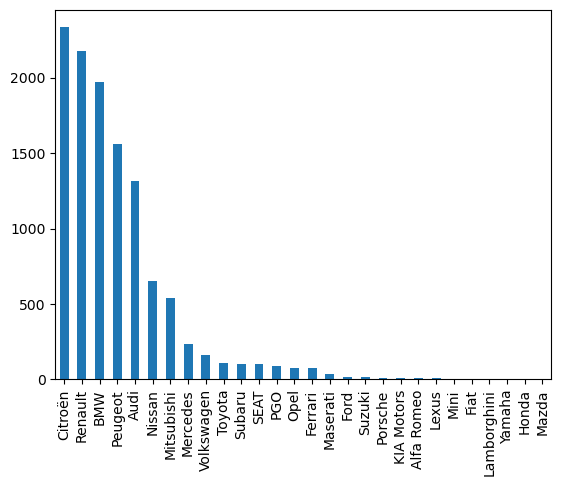

In [17]:
pd.DataFrame(df_final["model_key"].value_counts())["model_key"].plot.bar()

In [18]:
pd.DataFrame(df_final["model_key"].value_counts())

,model_key
Citroën,2334
Renault,2180
BMW,1974
Peugeot,1561
Audi,1316
Nissan,653
Mitsubishi,542
Mercedes,238
Volkswagen,163
Toyota,112


In [19]:
pd.DataFrame(df_final["fuel"].value_counts())

,fuel
diesel,11114
petrol,489
hybrid_petrol,12
electro,7


In [20]:
mileage_class = []
for m in df_final["mileage"]:
    if m <= 100000:
        mileage_class.append("< à 100k")
    elif m > 100000 and m <= 200000:
        mileage_class.append("> 100k < 200k")
    else:
        mileage_class.append("> 200k")
df_final["mileage_class"] = mileage_class

In [21]:
df_final

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class
0,507750,269550,mobile,ended,-81.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111,> 100k < 200k
1,543406,269550,mobile,ended,-70.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111,> 100k < 200k
2,552714,269550,mobile,ended,-108.0,Citroën,184223,120,diesel,white,estate,False,True,False,False,False,True,True,111,> 100k < 200k
3,511626,398802,mobile,ended,-203.0,Citroën,135980,120,diesel,grey,estate,True,True,False,False,True,True,True,122,> 100k < 200k
4,540217,398802,mobile,ended,-988.0,Citroën,135980,120,diesel,grey,estate,True,True,False,False,True,True,True,122,> 100k < 200k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,mobile,ended,-3.0,Renault,150204,85,diesel,blue,estate,False,True,False,False,False,False,True,75,> 100k < 200k
11618,569830,404261,mobile,ended,13.0,Citroën,158548,137,petrol,black,hatchback,False,True,False,False,False,False,True,104,> 100k < 200k
11619,574053,409672,mobile,ended,169.0,Audi,187367,180,diesel,black,sedan,True,True,False,False,True,False,True,128,> 100k < 200k
11620,568957,346718,mobile,ended,15.0,Nissan,100488,105,diesel,white,suv,False,True,False,True,False,True,True,127,> 100k < 200k


In [22]:
pd.DataFrame(df_final["mileage_class"].value_counts())

,mileage_class
> 100k < 200k,7497
< à 100k,2728
> 200k,1397


In [23]:
retard = []
for t in df_final["delay_at_checkout_in_minutes"]:
    if t <= 0:
        retard.append(0)
    else:
        retard.append(1)
df_final["delay_0"] = retard

In [24]:
retard_2 = []
for t in df_final["delay_at_checkout_in_minutes"]:
    if t <= 15:
        retard_2.append(0)
    else:
        retard_2.append(1)
df_final["delay_15"] = retard_2

In [25]:
retard_3 = []
for t in df_final["delay_at_checkout_in_minutes"]:
    if t <= 30:
        retard_3.append(0)
    else:
        retard_3.append(1)
df_final["delay_30"] = retard_3

In [26]:
pd.crosstab(df_final["mileage_class"], df_final["delay_0"], normalize=True)

delay_0,0,1
mileage_class,,
< à 100k,0.102306,0.132421
> 100k < 200k,0.264154,0.380916
> 200k,0.050938,0.069265


In [27]:
min(df_final["engine_power"])

0

In [28]:
df_final = df_final[df_final["engine_power"]!=50]

In [29]:
df_final[df_final["engine_power"]==0]

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,...,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30
2600,526111,377781,mobile,ended,-2.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,108,< à 100k,0,0,0
2601,545504,377781,mobile,ended,38.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,108,< à 100k,1,1,1
2602,518059,377781,mobile,ended,161.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,108,< à 100k,1,1,1
2603,550195,377781,mobile,ended,0.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,108,< à 100k,0,0,0
2604,544750,377781,mobile,ended,-50.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,108,< à 100k,0,0,0
2605,564190,377781,mobile,ended,218.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,108,< à 100k,1,1,1
2606,544138,377781,mobile,ended,6.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,108,< à 100k,1,0,0
2607,551420,377781,mobile,ended,-113.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,108,< à 100k,0,0,0
2608,559769,377781,mobile,ended,81.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,108,< à 100k,1,1,1
2609,539387,377781,mobile,ended,22.0,Nissan,81770,0,diesel,white,...,False,False,False,False,False,108,< à 100k,1,1,0


<Axes: ylabel='delay_0'>

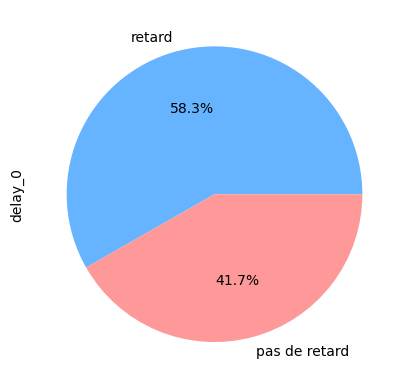

In [30]:
pd.DataFrame(df_final["delay_0"].value_counts())["delay_0"].plot.pie(autopct="%1.1f%%", colors=["#66B3FF", "#FF9999"], labels=["retard", "pas de retard"])

<Axes: ylabel='delay_15'>

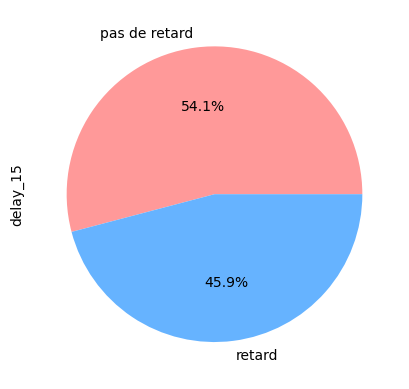

In [31]:
pd.DataFrame(df_final["delay_15"].value_counts())["delay_15"].plot.pie(autopct="%1.1f%%",  colors=["#FF9999","#66B3FF"], labels=[ "pas de retard", "retard"])

<Axes: ylabel='delay_30'>

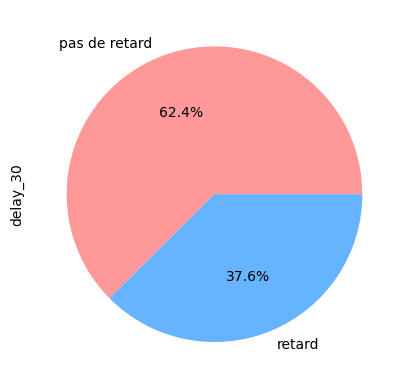

In [32]:
pd.DataFrame(df_final["delay_30"].value_counts())["delay_30"].plot.pie(autopct="%1.1f%%",  colors=["#FF9999","#66B3FF"], labels=[ "pas de retard", "retard"])

### Delay 0

In [33]:
df_delay_0 = pd.DataFrame(df_final["delay_0"].value_counts(ascending=True))

In [34]:
montant_moyen = df_final["rental_price_per_day"].mean()

In [35]:
df_delay_0["perte moyenne par jour"] = [0, montant_moyen]

In [36]:
df_delay_0

,delay_0,perte moyenne par jour
0,4851,0.00000
1,6771,121.11504


In [37]:
montant_moyen

121.1150404405438

In [38]:
montant_perte_0 = round( montant_moyen * df_delay_0["delay_0"].iloc[1], 0)

In [39]:
montant_perte_0

820070.0

In [40]:
df_delay_0["part revenue affecté (€)"] = [0, montant_perte_0]

In [41]:
df_delay_0

,delay_0,perte moyenne par jour,part revenue affecté (€)
0,4851,0.00000,0.0
1,6771,121.11504,820070.0


### Delay 15

In [42]:
df_delay_15 = pd.DataFrame(df_final["delay_15"].value_counts())

In [43]:
df_delay_15["perte moyenne par jour (€)"] = [0, montant_moyen]

In [44]:
df_delay_15

,delay_15,perte moyenne par jour (€)
0,6288,0.00000
1,5334,121.11504


In [45]:
montant_perte_15 = round(montant_moyen * df_delay_15["delay_15"].iloc[1], 0)

In [46]:
df_delay_15["part revenue affecté"] = [0, montant_perte_15]

In [47]:
df_delay_15

,delay_15,perte moyenne par jour (€),part revenue affecté
0,6288,0.00000,0.0
1,5334,121.11504,646028.0


### Delay 30

In [48]:
df_delay_30 = pd.DataFrame(df_final["delay_30"].value_counts())

In [49]:
df_delay_30["perte moyenne par jour (€)"] = [0, montant_moyen]

In [50]:
df_delay_30

,delay_30,perte moyenne par jour (€)
0,7254,0.00000
1,4368,121.11504


In [51]:
montant_perte_30 = round(montant_moyen * df_delay_30["delay_30"].iloc[1], 0)

In [52]:
montant_perte_30

529030.0

In [53]:
df_delay_30["part revenue affecté"] = [0, montant_perte_30]

In [54]:
df_delay_30

,delay_30,perte moyenne par jour (€),part revenue affecté
0,7254,0.00000,0.0
1,4368,121.11504,529030.0


In [55]:
engine_power_class = []
for e in df_final["engine_power"]:
    if e <= 100:
        engine_power_class.append("< à 100")
    elif e > 100 and e <= 150:
        engine_power_class.append("> 100 < 150")
    else:
        engine_power_class.append("> 150")
df_final["engine_power_class"] = engine_power_class

In [56]:
df_final

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,...,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30,engine_power_class
0,507750,269550,mobile,ended,-81.0,Citroën,184223,120,diesel,white,...,False,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150
1,543406,269550,mobile,ended,-70.0,Citroën,184223,120,diesel,white,...,False,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150
2,552714,269550,mobile,ended,-108.0,Citroën,184223,120,diesel,white,...,False,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150
3,511626,398802,mobile,ended,-203.0,Citroën,135980,120,diesel,grey,...,False,True,True,True,122,> 100k < 200k,0,0,0,> 100 < 150
4,540217,398802,mobile,ended,-988.0,Citroën,135980,120,diesel,grey,...,False,True,True,True,122,> 100k < 200k,0,0,0,> 100 < 150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,mobile,ended,-3.0,Renault,150204,85,diesel,blue,...,False,False,False,True,75,> 100k < 200k,0,0,0,< à 100
11618,569830,404261,mobile,ended,13.0,Citroën,158548,137,petrol,black,...,False,False,False,True,104,> 100k < 200k,1,0,0,> 100 < 150
11619,574053,409672,mobile,ended,169.0,Audi,187367,180,diesel,black,...,False,True,False,True,128,> 100k < 200k,1,1,1,> 150
11620,568957,346718,mobile,ended,15.0,Nissan,100488,105,diesel,white,...,True,False,True,True,127,> 100k < 200k,1,0,0,> 100 < 150


In [57]:
pd.crosstab(df_final["engine_power_class"], df_final["delay_0"])

delay_0,0,1
engine_power_class,,
< à 100,1281,1849
> 100 < 150,2559,3629
> 150,1011,1293


In [58]:
df_final["engine_power_class"].value_counts()

> 100 < 150    6188
< à 100        3130
> 150          2304
Name: engine_power_class, dtype: int64

In [59]:
df_final["delay_at_checkout_in_minutes"].value_counts()

 2.0       113
 4.0       113
 7.0       110
 6.0       106
 8.0       105
          ... 
-614.0       1
-541.0       1
 1190.0      1
-531.0       1
 1143.0      1
Name: delay_at_checkout_in_minutes, Length: 1476, dtype: int64

In [60]:
max(df_final["rental_price_per_day"])

422

In [61]:
min(df_final["rental_price_per_day"])

10

In [62]:
rental_price_per_day_class = []
for r in df_final["rental_price_per_day"]:
    if r <= 100:
        rental_price_per_day_class.append("< à 100e")
    elif r > 100 and r <= 200:
        rental_price_per_day_class.append("> 100 < 150e")
    elif r > 200 and r <= 300:
        rental_price_per_day_class.append("> 150 < 300e")
    else:
        rental_price_per_day_class.append("> 300e")
df_final["rental_price_per_day_class"] = rental_price_per_day_class

In [63]:
pd.DataFrame(df_final["rental_price_per_day_class"].value_counts())

,rental_price_per_day_class
> 100 < 150e,8887
< à 100e,2449
> 150 < 300e,279
> 300e,7


In [64]:
pd.crosstab(df_final["rental_price_per_day_class"], df_final["delay_0"])

delay_0,0,1
rental_price_per_day_class,,
< à 100e,953,1496
> 100 < 150e,3787,5100
> 150 < 300e,109,170
> 300e,2,5


In [65]:
df_agg = df_final.groupby("car_id").agg("count")

In [66]:
df_agg

,rental_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,car_type,...,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30,engine_power_class,rental_price_per_day_class
car_id,,,,,,,,,,,,,,,,,,,,,
163933,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
163949,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
164713,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
164719,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
164904,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414937,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
414948,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
414990,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [67]:
max(df_agg["rental_id"])

25

In [68]:
df_agg[df_agg["rental_id"]==25]

,rental_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,car_type,...,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30,engine_power_class,rental_price_per_day_class
car_id,,,,,,,,,,,,,,,,,,,,,
241021,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [69]:
df_final[df_final["car_id"]== 241021]

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,...,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30,engine_power_class,rental_price_per_day_class
805,554508,241021,connect,ended,-37.0,BMW,121510,85,diesel,black,...,False,True,True,96,> 100k < 200k,0,0,0,< à 100,< à 100e
806,563552,241021,connect,ended,25.0,BMW,121510,85,diesel,black,...,False,True,True,96,> 100k < 200k,1,1,0,< à 100,< à 100e
807,567278,241021,connect,ended,-425.0,BMW,121510,85,diesel,black,...,False,True,True,96,> 100k < 200k,0,0,0,< à 100,< à 100e
808,561487,241021,connect,ended,-209.0,BMW,121510,85,diesel,black,...,False,True,True,96,> 100k < 200k,0,0,0,< à 100,< à 100e
809,566398,241021,connect,ended,-288.0,BMW,121510,85,diesel,black,...,False,True,True,96,> 100k < 200k,0,0,0,< à 100,< à 100e
810,540311,241021,connect,ended,48.0,BMW,121510,85,diesel,black,...,False,True,True,96,> 100k < 200k,1,1,1,< à 100,< à 100e
811,542613,241021,connect,ended,87.0,BMW,121510,85,diesel,black,...,False,True,True,96,> 100k < 200k,1,1,1,< à 100,< à 100e
812,571991,241021,connect,ended,-14.0,BMW,121510,85,diesel,black,...,False,True,True,96,> 100k < 200k,0,0,0,< à 100,< à 100e
813,534073,241021,connect,ended,283.0,BMW,121510,85,diesel,black,...,False,True,True,96,> 100k < 200k,1,1,1,< à 100,< à 100e
814,574151,241021,connect,ended,3.0,BMW,121510,85,diesel,black,...,False,True,True,96,> 100k < 200k,1,0,0,< à 100,< à 100e


In [70]:
df_agg_exemple_complet = df_final.groupby("car_id").agg(
{
    "rental_id" : "count",
    "delay_at_checkout_in_minutes" : ["max","min"],
    "rental_price_per_day" : list
}

)

In [71]:
df_agg_exemple_complet

rental_id delay_at_checkout_in_minutes        rental_price_per_day
           count                          max    min                 list
car_id                                                                   
163933         1                       -226.0 -226.0                 [88]
163949         1                          3.0    3.0                [153]
164713         2                        -27.0 -600.0             [52, 52]
164719         1                        -15.0  -15.0                [154]
164904         1                        296.0  296.0                [110]
...          ...                          ...    ...                  ...
414937         1                       -541.0 -541.0                [133]
414948         1                         -2.0   -2.0                [127]
414990         1                          8.0    8.0                [121]
414991         1                        225.0  225.0                [132]
415000         1                         50.0   50.0                [151]

[4843 rows x 4 columns]

In [72]:
df_agg_exemple_complet[df_agg_exemple_complet["rental_id"]["count"]==25]

rental_id delay_at_checkout_in_minutes         \
           count                          max    min   
car_id                                                 
241021        25                        283.0 -486.0   

                                     rental_price_per_day  
                                                     list  
car_id                                                     
241021  [96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 9...

## Partie machine learning 

### Encodage des colonnes qualitatives en quantitatives 

#### Encodage de la colonne model key 

In [73]:
le = LabelEncoder()
df_pricing["model_key_num"] = le.fit_transform(df_pricing["model_key"])

#### Encodage de la colonne fuel num

In [74]:
df_pricing["fuel_num"] = le.fit_transform(df_pricing["fuel"])

#### Encodage de la colonne paint color num 

In [75]:
df_pricing["paint_color_num"] = le.fit_transform(df_pricing["paint_color"])

#### Encodage de la colonne car type num

In [76]:
df_pricing["car_type_num"] = le.fit_transform(df_pricing["car_type"])

#### Encodage de la colonne private_parking_available_num

In [77]:
df_pricing["private_parking_available_num"] = le.fit_transform(df_pricing["private_parking_available"])

#### Encodage de la colonne has_gps_num

In [78]:
df_pricing["has_gps_num"] = le.fit_transform(df_pricing["has_gps"])

#### Encodage de la colonne has_air_conditioning_num

In [79]:
df_pricing["has_air_conditioning_num"] = le.fit_transform(df_pricing["has_air_conditioning"])

#### Encodage de la colonne automatic_car_num

In [80]:
df_pricing["automatic_car_num"] = le.fit_transform(df_pricing["automatic_car"])

#### Encodage de la colonne has_getaround_connect_num

In [81]:
df_pricing["has_getaround_connect_num"] = le.fit_transform(df_pricing["has_getaround_connect"])

#### Encodage de la colonne has_speed_regulator_num


In [82]:
df_pricing["has_speed_regulator_num"] = le.fit_transform(df_pricing["has_speed_regulator"])

#### Encodage de la colonne winter_tires_num

In [83]:
df_pricing["winter_tires_num"] = le.fit_transform(df_pricing["winter_tires"])

#### Suppression des colonnes qualitatives 

In [84]:
df_pricing.drop(["model_key", "fuel", "paint_color", "car_type", "private_parking_available", "has_gps", "has_air_conditioning", "automatic_car", "has_getaround_connect", "has_speed_regulator", "winter_tires"], axis=1, inplace=True) 

In [85]:
df_pricing

,car_id,mileage,engine_power,rental_price_per_day,model_key_num,fuel_num,paint_color_num,car_type_num,private_parking_available_num,has_gps_num,has_air_conditioning_num,automatic_car_num,has_getaround_connect_num,has_speed_regulator_num,winter_tires_num
0,262144,140411,100,106,3,0,1,0,1,1,0,0,1,1,1
1,360459,13929,317,264,3,3,5,0,1,1,0,0,0,1,1
2,360460,183297,120,101,3,0,9,0,0,0,0,0,1,0,1
3,393227,128035,135,158,3,0,7,0,1,1,0,0,1,1,1
4,393239,97097,160,183,3,0,8,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,414990,39743,110,121,25,0,1,7,0,1,0,0,0,0,1
4839,414991,49832,100,132,25,0,5,7,0,1,0,0,0,0,1
4840,349458,19633,110,130,25,0,5,7,0,1,0,0,0,0,1
4841,415000,27920,110,151,25,0,3,7,1,1,0,0,0,0,1


### Matrice de correlation

<Axes: >

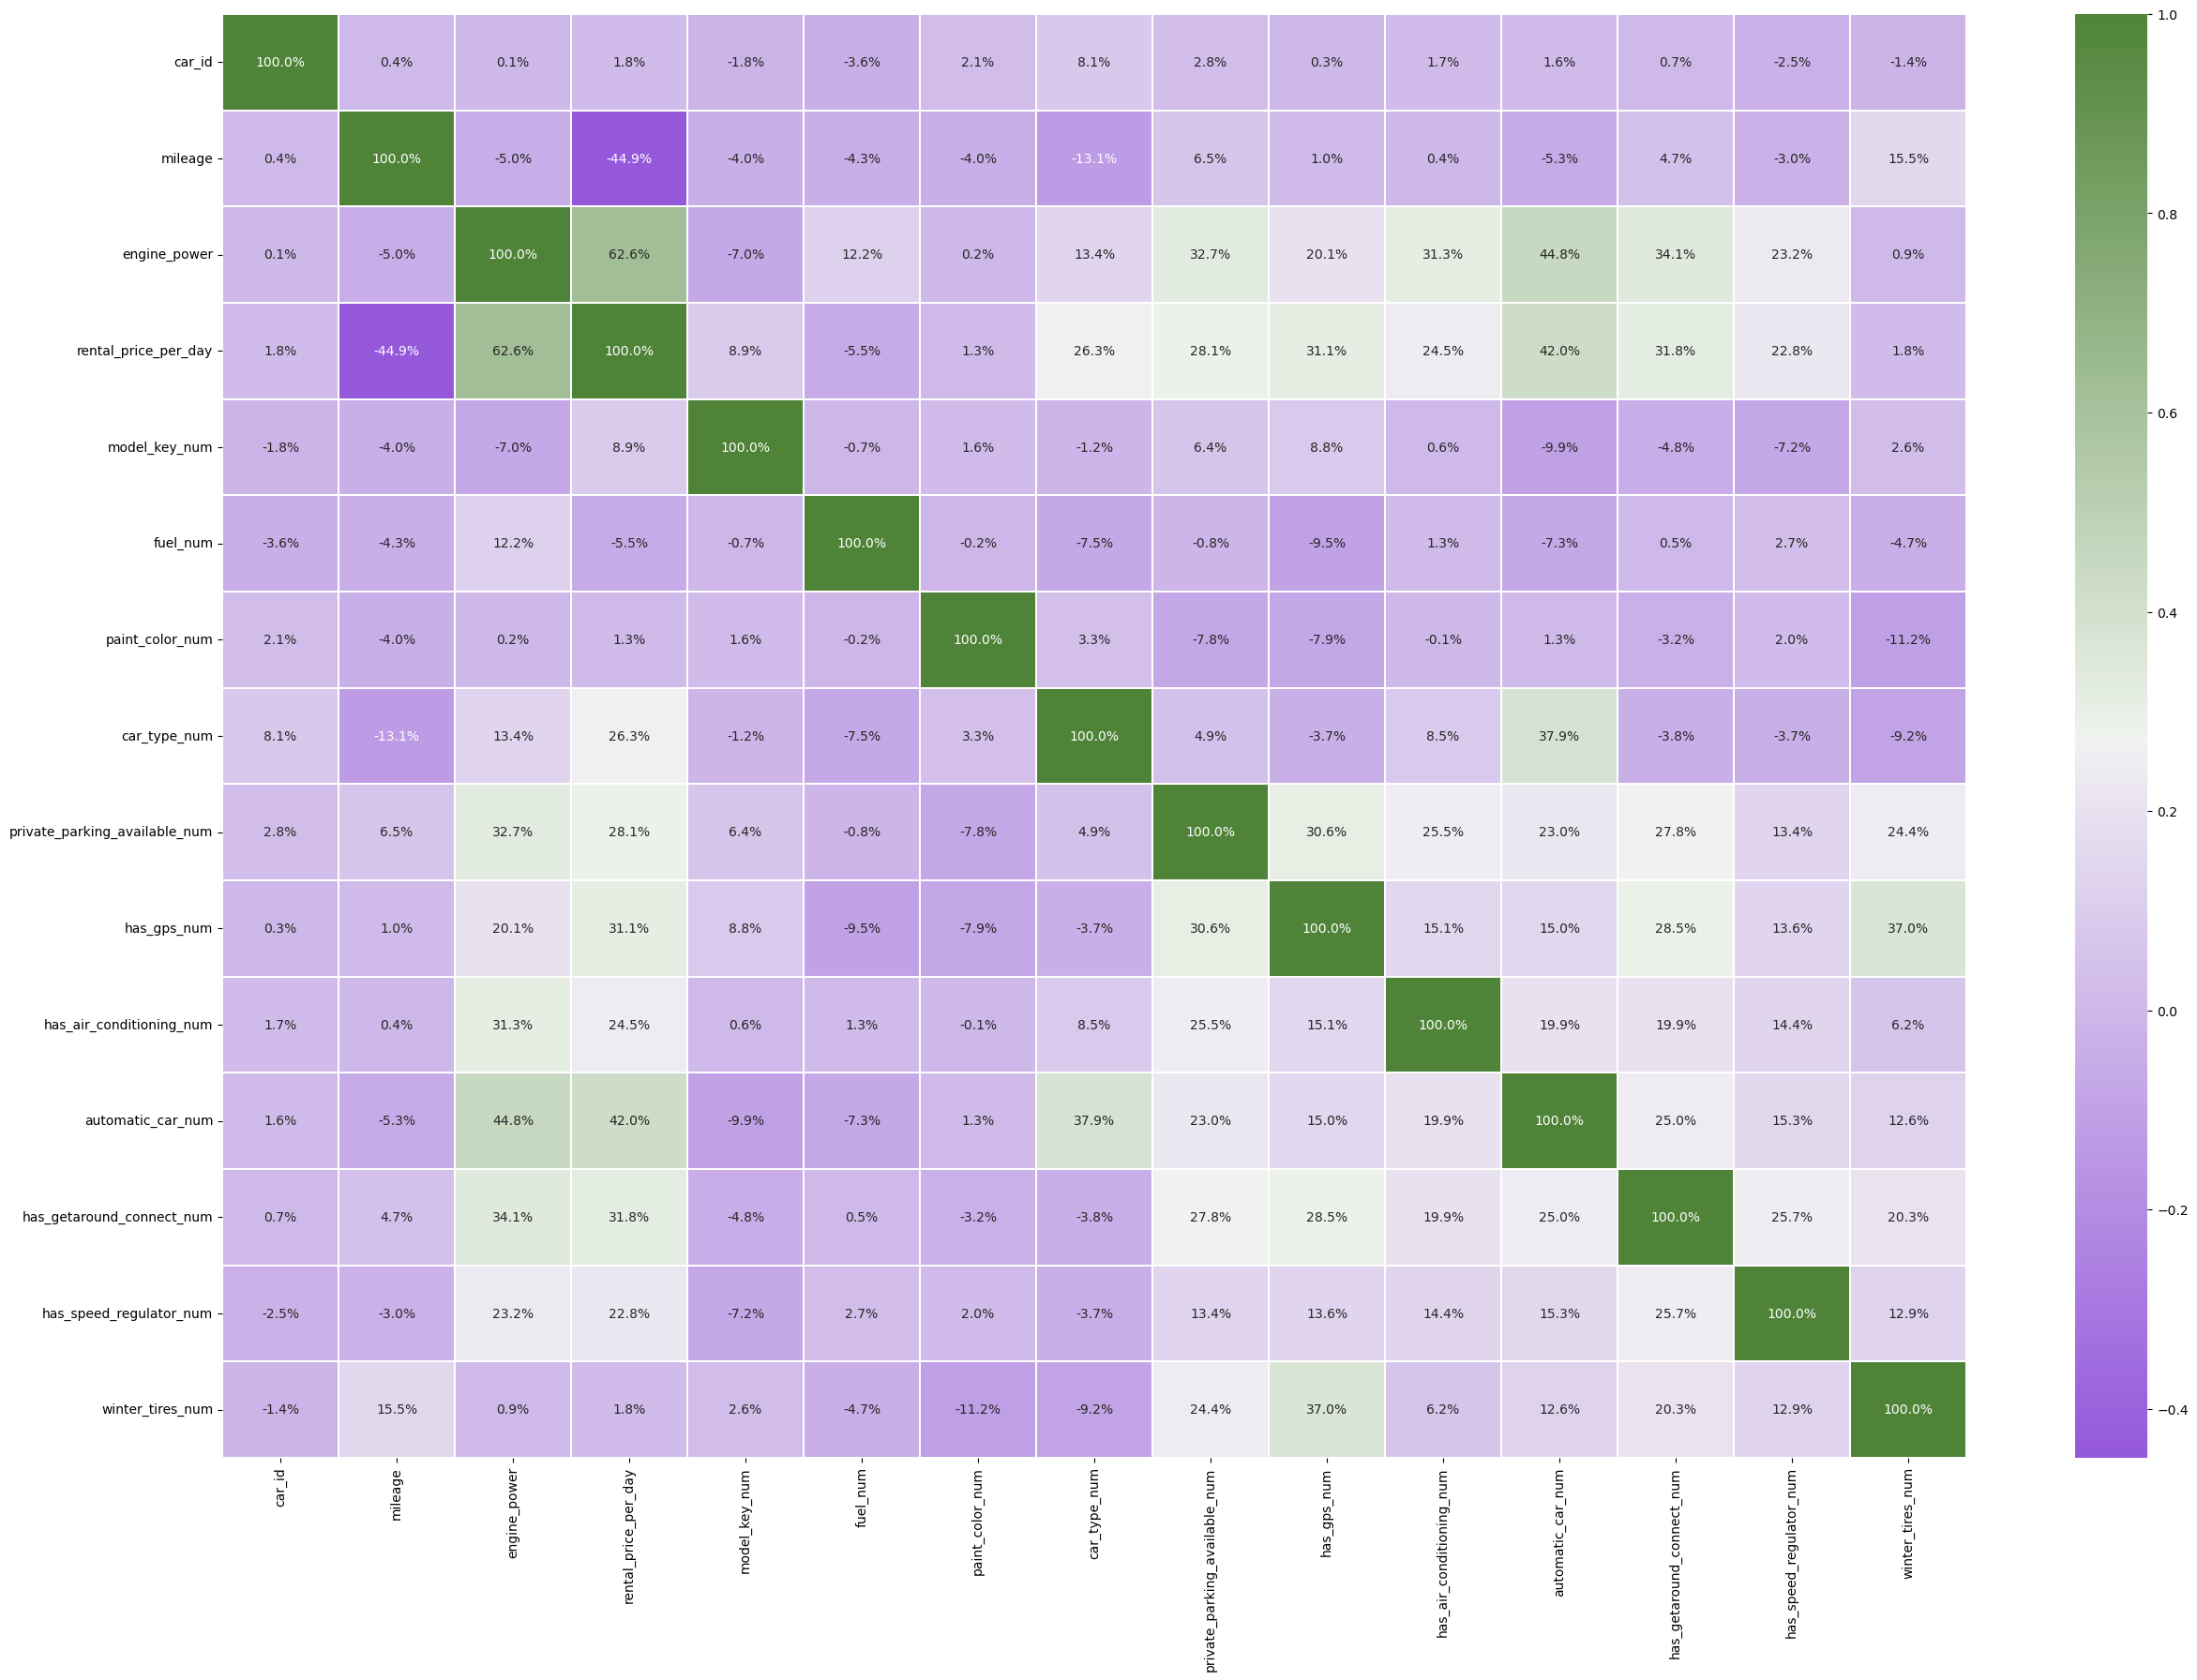

In [86]:
plt.figure(figsize=(30, 20))
cmap_ = sns.diverging_palette(1000, 120, as_cmap=True)
sns.heatmap(df_pricing.corr(), annot=True, fmt=".1%",linewidths=.06, cmap=cmap_) 

#### Selection des colonnes

In [87]:
columns_to_save = ["mileage", "engine_power", "has_gps_num", "automatic_car_num", "has_getaround_connect_num", "rental_price_per_day","has_air_conditioning_num","has_speed_regulator_num", "car_type_num"]

In [88]:
df_ml_ = df_pricing[columns_to_save] 

In [89]:
df_ml_

,mileage,engine_power,has_gps_num,automatic_car_num,has_getaround_connect_num,rental_price_per_day,has_air_conditioning_num,has_speed_regulator_num,car_type_num
0,140411,100,1,0,1,106,0,1,0
1,13929,317,1,0,0,264,0,1,0
2,183297,120,0,0,1,101,0,0,0
3,128035,135,1,0,1,158,0,1,0
4,97097,160,1,0,0,183,0,1,0
...,...,...,...,...,...,...,...,...,...
4838,39743,110,1,0,0,121,0,0,7
4839,49832,100,1,0,0,132,0,0,7
4840,19633,110,1,0,0,130,0,0,7
4841,27920,110,1,0,0,151,0,0,7


#### Split du dataset

In [90]:
Y = df_ml_["rental_price_per_day"]
X = df_ml_.drop("rental_price_per_day", axis=1)

In [91]:
X

,mileage,engine_power,has_gps_num,automatic_car_num,has_getaround_connect_num,has_air_conditioning_num,has_speed_regulator_num,car_type_num
0,140411,100,1,0,1,0,1,0
1,13929,317,1,0,0,0,1,0
2,183297,120,0,0,1,0,0,0
3,128035,135,1,0,1,0,1,0
4,97097,160,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4838,39743,110,1,0,0,0,0,7
4839,49832,100,1,0,0,0,0,7
4840,19633,110,1,0,0,0,0,7
4841,27920,110,1,0,0,0,0,7


#### Split du dataset en deux , test et apprentissage

In [92]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



### Selection de variable avec REF (recursive feature elimination)

In [93]:
model_ref = LinearRegression()

In [94]:
ref = RFE(estimator=model_ref, n_features_to_select=8)
ref.fit(X_train, Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [95]:
selected_future = X_train.columns[ref.support_]

In [96]:
selected_future

Index(['mileage', 'engine_power', 'has_gps_num', 'automatic_car_num',
       'has_getaround_connect_num', 'has_air_conditioning_num',
       'has_speed_regulator_num', 'car_type_num'],
      dtype='object')

### Models ml

#### Model LR

In [97]:

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

LinearRegression()

In [98]:
model_LR.score(X_train,Y_train) * 100

64.36287001270821

#### RandomForest

In [99]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, Y_train)

RandomForestRegressor()

In [100]:
model_RF.score(X_train,Y_train) * 100

95.94918952970355

#### Model DT

In [101]:
model_decision = DecisionTreeRegressor()
model_decision.fit(X_train, Y_train)

DecisionTreeRegressor()

In [102]:
model_decision.score(X_train,Y_train) * 100

99.99990856982332

#### Model ADAB

In [103]:
model_ADA = AdaBoostRegressor()
model_ADA.fit(X_train, Y_train)

AdaBoostRegressor()

In [104]:
model_ADA.score(X_train,Y_train)

0.44626367967611047

#### Model GB

In [105]:
model_gra = GradientBoostingRegressor()
model_gra.fit(X_train, Y_train)

GradientBoostingRegressor()

In [106]:
model_gra.score(X_train,Y_train) * 100

74.54091270263845

#### Model Ridge

In [107]:
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
ridge_model.score(X_train,Y_train) * 100

64.36286190862164

#### Model Lasso

In [108]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
lasso_model.score(X_train,Y_train) * 100

62.78355490331645

### Score test

#### R2 pour LR

In [109]:
y_pred_LR = model_LR.predict(X_test)

In [110]:
r2 = r2_score(Y_test,y_pred_LR) * 100

In [111]:
print("R2:", r2)

R2: 64.55815064983028


#### R2 pour RF

In [112]:
y_pred_RF = model_RF.predict(X_test)

In [113]:
r2_RF = r2_score(Y_test,y_pred_RF)

In [114]:
r2_RF * 100

69.6583979092259

#### R2 pour DT

In [115]:
y_pred_decision = model_decision.predict(X_test)

In [116]:
r2_decision = r2_score(Y_test,y_pred_decision)

In [117]:
r2_decision * 100

55.24909325208438

#### R2 pour ADA

In [118]:
y_pred_ADA = model_ADA.predict(X_test)

In [119]:
r2_ADA = r2_score(Y_test,y_pred_ADA)

In [120]:
r2_ADA

0.3761198716955597

### R2 pour GB

In [121]:
y_pred_gra = model_gra.predict(X_test)

In [122]:
r2_gra = r2_score(Y_test,y_pred_gra)

In [123]:
r2_gra

0.6948957915921476

In [124]:
y_pred_gra = model_gra.predict(X_test)
r2_gra = r2_score(Y_test,y_pred_gra)
r2_gra * 100

69.48957915921477

#### R2 pour Ridge

In [125]:
ridge_model.score(X_train,Y_train) * 100

64.36286190862164

In [126]:
y_pred_ridge = ridge_model.predict(X_test)

In [127]:
r2_ridge = r2_score(Y_test,y_pred_ridge)

In [128]:
r2_ridge * 100

64.56126187443077

#### R2 pour lasso 

In [129]:
y_pred_lasso = lasso_model.predict(X_test)

In [130]:
r2_lasso = r2_score(Y_test,y_pred_lasso)

In [131]:
r2_lasso * 100

64.09037609961882

### Grid search

In [132]:
gra = GradientBoostingRegressor(random_state=42)
par_grid_gra = {
    "n_estimators" : [100, 200], 
    "learning_rate" : [0.05, 0.1, 0.2],
    "max_depth" : [3, 4],
    "min_samples_split" : [2, 5],
    "min_samples_leaf" : [1, 3],
}

grid_search_gra = GridSearchCV(estimator=gra, param_grid=par_grid_gra, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)
grid_search_gra.fit(X_train, Y_train)
print("meilleur paramettre = ", grid_search_gra.best_params_)
print("meilleur score = ", grid_search_gra.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
meilleur paramettre =  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
meilleur score =  -331.3940666464201


In [133]:
best_model = grid_search_gra.best_estimator_

In [134]:
best_model

GradientBoostingRegressor(max_depth=4, min_samples_split=5, n_estimators=200,
                          random_state=42)

In [135]:
y_pred_gra_gr = best_model.predict(X_test)
r2_gra_gr = r2_score(Y_test,y_pred_gra_gr)
r2_gra_gr

0.7053665934552867

### Tableau des perfomances 

In [136]:
performance = pd.DataFrame()
performance["model"] = ["LR", "RIDGE", "LASSO", "RF", "DT", "GB"]
performance["performance en apprentissage (%)"] = [64.36, 64.36,62.78, 95.82, 99.99, 74.54]
performance["perfomance en test (%)"] = [64.55, 64.56, 64.09, 69.43, 53.66, 69.48]

In [137]:
performance

,model,performance en apprentissage (%),perfomance en test (%)
0,LR,64.36,64.55
1,RIDGE,64.36,64.56
2,LASSO,62.78,64.09
3,RF,95.82,69.43
4,DT,99.99,53.66
5,GB,74.54,69.48


## Sauvegarde du golden model 

In [138]:
with open("golden GB for car_location", "wb") as f:
    pickle.dump(model_gra, f)

In [139]:
import os 
os.getcwd()

'C:\\Users\\Monaim\\PycharmProjects\\github\\partie-ML-'

In [140]:
selected_future

Index(['mileage', 'engine_power', 'has_gps_num', 'automatic_car_num',
       'has_getaround_connect_num', 'has_air_conditioning_num',
       'has_speed_regulator_num', 'car_type_num'],
      dtype='object')

### Analayse de données

In [141]:
pd.crosstab(df_final["checkin_type"], df_final["delay_0"])

delay_0,0,1
checkin_type,,
connect,1237,966
mobile,3614,5805


In [142]:
checkin_type_dict = {
    "connect" : 0,
    "mobile" : 1
}


In [143]:
list_checkin_type_num = []
for value in df_final["checkin_type"]:
    list_checkin_type_num.append(checkin_type_dict[value])
    

In [144]:
list_checkin_2 = []
for value in df_final["checkin_type"]:
    if value == "connect":
        list_checkin_2.append(0)
    else:
        list_checkin_2.append(1)
        

In [145]:
len(df_final["checkin_type"])

11622

In [146]:
34866 / 11622

3.0

In [147]:
df_final["checkin_type"] = list_checkin_type_num

In [148]:
df_final

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,...,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30,engine_power_class,rental_price_per_day_class
0,507750,269550,1,ended,-81.0,Citroën,184223,120,diesel,white,...,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
1,543406,269550,1,ended,-70.0,Citroën,184223,120,diesel,white,...,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
2,552714,269550,1,ended,-108.0,Citroën,184223,120,diesel,white,...,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
3,511626,398802,1,ended,-203.0,Citroën,135980,120,diesel,grey,...,True,True,True,122,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
4,540217,398802,1,ended,-988.0,Citroën,135980,120,diesel,grey,...,True,True,True,122,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,1,ended,-3.0,Renault,150204,85,diesel,blue,...,False,False,True,75,> 100k < 200k,0,0,0,< à 100,< à 100e
11618,569830,404261,1,ended,13.0,Citroën,158548,137,petrol,black,...,False,False,True,104,> 100k < 200k,1,0,0,> 100 < 150,> 100 < 150e
11619,574053,409672,1,ended,169.0,Audi,187367,180,diesel,black,...,True,False,True,128,> 100k < 200k,1,1,1,> 150,> 100 < 150e
11620,568957,346718,1,ended,15.0,Nissan,100488,105,diesel,white,...,False,True,True,127,> 100k < 200k,1,0,0,> 100 < 150,> 100 < 150e


In [149]:
list_checkin_2

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [150]:
checkin_type_dict["connect"]

0

In [151]:
pd.DataFrame(df_final["state"].value_counts())

,state
ended,11621
canceled,1


In [152]:
df_final.drop('state', axis=1, inplace=True)

In [153]:
df_final

,rental_id,car_id,checkin_type,delay_at_checkout_in_minutes,model_key,mileage,engine_power,fuel,paint_color,car_type,...,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30,engine_power_class,rental_price_per_day_class
0,507750,269550,1,-81.0,Citroën,184223,120,diesel,white,estate,...,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
1,543406,269550,1,-70.0,Citroën,184223,120,diesel,white,estate,...,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
2,552714,269550,1,-108.0,Citroën,184223,120,diesel,white,estate,...,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
3,511626,398802,1,-203.0,Citroën,135980,120,diesel,grey,estate,...,True,True,True,122,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
4,540217,398802,1,-988.0,Citroën,135980,120,diesel,grey,estate,...,True,True,True,122,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,1,-3.0,Renault,150204,85,diesel,blue,estate,...,False,False,True,75,> 100k < 200k,0,0,0,< à 100,< à 100e
11618,569830,404261,1,13.0,Citroën,158548,137,petrol,black,hatchback,...,False,False,True,104,> 100k < 200k,1,0,0,> 100 < 150,> 100 < 150e
11619,574053,409672,1,169.0,Audi,187367,180,diesel,black,sedan,...,True,False,True,128,> 100k < 200k,1,1,1,> 150,> 100 < 150e
11620,568957,346718,1,15.0,Nissan,100488,105,diesel,white,suv,...,False,True,True,127,> 100k < 200k,1,0,0,> 100 < 150,> 100 < 150e


In [154]:
df_final.drop('delay_at_checkout_in_minutes', axis=1, inplace=True)

In [155]:
df_final["model_key"].value_counts()

Citroën        2334
Renault        2180
BMW            1974
Peugeot        1561
Audi           1316
Nissan          653
Mitsubishi      542
Mercedes        238
Volkswagen      163
Toyota          112
Subaru          104
SEAT            100
PGO              88
Opel             76
Ferrari          74
Maserati         35
Ford             15
Suzuki           15
Porsche          10
KIA Motors        8
Alfa Romeo        8
Lexus             6
Mini              3
Fiat              2
Lamborghini       2
Yamaha            1
Honda             1
Mazda             1
Name: model_key, dtype: int64

In [156]:
pd.crosstab(df_final["model_key"], df_final["delay_0"])

delay_0,0,1
model_key,,
Alfa Romeo,3,5
Audi,587,729
BMW,839,1135
Citroën,958,1376
Ferrari,35,39
Fiat,1,1
Ford,5,10
Honda,0,1
KIA Motors,5,3


In [157]:
le = LabelEncoder()
df_final["model_key"] = le.fit_transform(df_final["model_key"])

In [158]:
df_final

,rental_id,car_id,checkin_type,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,...,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30,engine_power_class,rental_price_per_day_class
0,507750,269550,1,3,184223,120,diesel,white,estate,False,...,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
1,543406,269550,1,3,184223,120,diesel,white,estate,False,...,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
2,552714,269550,1,3,184223,120,diesel,white,estate,False,...,False,True,True,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
3,511626,398802,1,3,135980,120,diesel,grey,estate,True,...,True,True,True,122,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
4,540217,398802,1,3,135980,120,diesel,grey,estate,True,...,True,True,True,122,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,1,21,150204,85,diesel,blue,estate,False,...,False,False,True,75,> 100k < 200k,0,0,0,< à 100,< à 100e
11618,569830,404261,1,3,158548,137,petrol,black,hatchback,False,...,False,False,True,104,> 100k < 200k,1,0,0,> 100 < 150,> 100 < 150e
11619,574053,409672,1,1,187367,180,diesel,black,sedan,True,...,True,False,True,128,> 100k < 200k,1,1,1,> 150,> 100 < 150e
11620,568957,346718,1,16,100488,105,diesel,white,suv,False,...,False,True,True,127,> 100k < 200k,1,0,0,> 100 < 150,> 100 < 150e


In [159]:
df_final["fuel"].value_counts()

diesel           11114
petrol             489
hybrid_petrol       12
electro              7
Name: fuel, dtype: int64

In [160]:
pd.crosstab(df_final["fuel"], df_final["delay_0"])

delay_0,0,1
fuel,,
diesel,4640,6474
electro,1,6
hybrid_petrol,5,7
petrol,205,284


In [161]:
df_final["fuel"] = le.fit_transform(df_final["fuel"])

In [162]:
df_final["paint_color"].value_counts()

black     3938
grey      2687
blue      1718
white     1317
brown      865
silver     821
red        128
beige       98
green       38
orange      12
Name: paint_color, dtype: int64

In [163]:
pd.crosstab(df_final["paint_color"], df_final["delay_0"])

delay_0,0,1
paint_color,,
beige,38,60
black,1693,2245
blue,748,970
brown,370,495
green,17,21
grey,1047,1640
orange,5,7
red,40,88
silver,328,493


In [164]:
df_final["paint_color"] = le.fit_transform(df_final["paint_color"])

In [165]:
df_final["car_type"].value_counts()

estate         3828
sedan          2910
suv            2457
hatchback      1718
subcompact      277
coupe           248
convertible     107
van              77
Name: car_type, dtype: int64

In [166]:
pd.crosstab(df_final["car_type"], df_final["delay_0"])

delay_0,0,1
car_type,,
convertible,37,70
coupe,100,148
estate,1582,2246
hatchback,714,1004
sedan,1252,1658
subcompact,112,165
suv,1019,1438
van,35,42


In [167]:
df_final["car_type"] = le.fit_transform(df_final["car_type"])

In [168]:
df_final["private_parking_available"].value_counts()

True     6390
False    5232
Name: private_parking_available, dtype: int64

In [169]:
pd.crosstab(df_final["private_parking_available"], df_final["delay_0"])

delay_0,0,1
private_parking_available,,
False,2158,3074
True,2693,3697


In [170]:
df_final["private_parking_available"] = le.fit_transform(df_final["private_parking_available"])

In [171]:
df_final.columns

Index(['rental_id', 'car_id', 'checkin_type', 'model_key', 'mileage',
       'engine_power', 'fuel', 'paint_color', 'car_type',
       'private_parking_available', 'has_gps', 'has_air_conditioning',
       'automatic_car', 'has_getaround_connect', 'has_speed_regulator',
       'winter_tires', 'rental_price_per_day', 'mileage_class', 'delay_0',
       'delay_15', 'delay_30', 'engine_power_class',
       'rental_price_per_day_class'],
      dtype='object')

In [172]:
df_final["has_gps"].value_counts()

True     9301
False    2321
Name: has_gps, dtype: int64

In [173]:
pd.crosstab(df_final["has_gps"], df_final["delay_0"])

delay_0,0,1
has_gps,,
False,920,1401
True,3931,5370


In [174]:
df_final["has_gps"] = le.fit_transform(df_final["has_gps"])

In [175]:
df_final["has_air_conditioning"].value_counts()

False    9345
True     2277
Name: has_air_conditioning, dtype: int64

In [176]:
pd.crosstab(df_final["has_air_conditioning"], df_final["delay_0"])

delay_0,0,1
has_air_conditioning,,
False,3902,5443
True,949,1328


In [177]:
df_final["has_air_conditioning"] = le.fit_transform(df_final["has_air_conditioning"])

In [178]:
df_final["automatic_car"].value_counts()

False    9383
True     2239
Name: automatic_car, dtype: int64

In [179]:
pd.crosstab(df_final["automatic_car"], df_final["delay_0"])

delay_0,0,1
automatic_car,,
False,3884,5499
True,967,1272


In [180]:
df_final["automatic_car"] = le.fit_transform(df_final["automatic_car"])

In [181]:
df_final["has_getaround_connect"].value_counts()

False    6353
True     5269
Name: has_getaround_connect, dtype: int64

In [182]:
pd.crosstab(df_final["has_getaround_connect"], df_final["delay_0"])

delay_0,0,1
has_getaround_connect,,
False,2635,3718
True,2216,3053


In [183]:
df_final["has_getaround_connect"] = le.fit_transform(df_final["has_getaround_connect"])

In [184]:
df_final["has_speed_regulator"].value_counts()

False    8806
True     2816
Name: has_speed_regulator, dtype: int64

In [185]:
pd.crosstab(df_final["has_speed_regulator"], df_final["delay_0"])

delay_0,0,1
has_speed_regulator,,
False,3649,5157
True,1202,1614


In [186]:
df_final["has_speed_regulator"] = le.fit_transform(df_final["has_speed_regulator"])

In [187]:
df_final["winter_tires"].value_counts()

True     10890
False      732
Name: winter_tires, dtype: int64

In [188]:
pd.crosstab(df_final["winter_tires"], df_final["delay_0"])

delay_0,0,1
winter_tires,,
False,292,440
True,4559,6331


In [189]:
df_final["winter_tires"] = le.fit_transform(df_final["winter_tires"])

In [190]:
df_final

,rental_id,car_id,checkin_type,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,...,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30,engine_power_class,rental_price_per_day_class
0,507750,269550,1,3,184223,120,0,9,2,0,...,0,1,1,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
1,543406,269550,1,3,184223,120,0,9,2,0,...,0,1,1,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
2,552714,269550,1,3,184223,120,0,9,2,0,...,0,1,1,111,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
3,511626,398802,1,3,135980,120,0,5,2,1,...,1,1,1,122,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
4,540217,398802,1,3,135980,120,0,5,2,1,...,1,1,1,122,> 100k < 200k,0,0,0,> 100 < 150,> 100 < 150e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,1,21,150204,85,0,2,2,0,...,0,0,1,75,> 100k < 200k,0,0,0,< à 100,< à 100e
11618,569830,404261,1,3,158548,137,3,1,3,0,...,0,0,1,104,> 100k < 200k,1,0,0,> 100 < 150,> 100 < 150e
11619,574053,409672,1,1,187367,180,0,1,4,1,...,1,0,1,128,> 100k < 200k,1,1,1,> 150,> 100 < 150e
11620,568957,346718,1,16,100488,105,0,9,6,0,...,0,1,1,127,> 100k < 200k,1,0,0,> 100 < 150,> 100 < 150e


In [191]:
pd.crosstab(df_final["mileage_class"], df_final["delay_0"])

delay_0,0,1
mileage_class,,
< à 100k,1189,1539
> 100k < 200k,3070,4427
> 200k,592,805


In [192]:
df_final["mileage_class"] = le.fit_transform(df_final["mileage_class"])

In [193]:
pd.crosstab(df_final["engine_power_class"], df_final["delay_0"])

delay_0,0,1
engine_power_class,,
< à 100,1281,1849
> 100 < 150,2559,3629
> 150,1011,1293


In [194]:
df_final["engine_power_class"] = le.fit_transform(df_final["engine_power_class"])

In [195]:
pd.crosstab(df_final["rental_price_per_day_class"], df_final["delay_0"])

delay_0,0,1
rental_price_per_day_class,,
< à 100e,953,1496
> 100 < 150e,3787,5100
> 150 < 300e,109,170
> 300e,2,5


In [196]:
df_final["rental_price_per_day_class"] = le.fit_transform(df_final["rental_price_per_day_class"])

In [197]:
df_final

,rental_id,car_id,checkin_type,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,...,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30,engine_power_class,rental_price_per_day_class
0,507750,269550,1,3,184223,120,0,9,2,0,...,0,1,1,111,1,0,0,0,1,1
1,543406,269550,1,3,184223,120,0,9,2,0,...,0,1,1,111,1,0,0,0,1,1
2,552714,269550,1,3,184223,120,0,9,2,0,...,0,1,1,111,1,0,0,0,1,1
3,511626,398802,1,3,135980,120,0,5,2,1,...,1,1,1,122,1,0,0,0,1,1
4,540217,398802,1,3,135980,120,0,5,2,1,...,1,1,1,122,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,569730,331627,1,21,150204,85,0,2,2,0,...,0,0,1,75,1,0,0,0,0,0
11618,569830,404261,1,3,158548,137,3,1,3,0,...,0,0,1,104,1,1,0,0,1,1
11619,574053,409672,1,1,187367,180,0,1,4,1,...,1,0,1,128,1,1,1,1,2,1
11620,568957,346718,1,16,100488,105,0,9,6,0,...,0,1,1,127,1,1,0,0,1,1


In [198]:
df_final.drop(["rental_id", "car_id"], axis=1, inplace=True)

In [199]:
df_final

,checkin_type,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,...,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_class,delay_0,delay_15,delay_30,engine_power_class,rental_price_per_day_class
0,1,3,184223,120,0,9,2,0,1,0,...,0,1,1,111,1,0,0,0,1,1
1,1,3,184223,120,0,9,2,0,1,0,...,0,1,1,111,1,0,0,0,1,1
2,1,3,184223,120,0,9,2,0,1,0,...,0,1,1,111,1,0,0,0,1,1
3,1,3,135980,120,0,5,2,1,1,0,...,1,1,1,122,1,0,0,0,1,1
4,1,3,135980,120,0,5,2,1,1,0,...,1,1,1,122,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11617,1,21,150204,85,0,2,2,0,1,0,...,0,0,1,75,1,0,0,0,0,0
11618,1,3,158548,137,3,1,3,0,1,0,...,0,0,1,104,1,1,0,0,1,1
11619,1,1,187367,180,0,1,4,1,1,0,...,1,0,1,128,1,1,1,1,2,1
11620,1,16,100488,105,0,9,6,0,1,0,...,0,1,1,127,1,1,0,0,1,1
